# Team 03 - UDCN
### Date Experiment: 16.30 - Nov.21,2018 - Date Analysis: 23.11 - Nov.21,2018

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pylab as plt
import statsmodels.formula.api as smf

In [19]:
data=pd.read_csv('Data_Experiment_Nov212018.csv')
# Tinh so dem - tru phong
data['N']=np.mean(data.loc[:,'N1':'N2'],axis=1)
data.loc[1:,'N']=data.loc[1:,'N'] - data.loc[0,'N']
# Tinh rho = mass / volume
data['rho']=data['Mass']/data['Volume']
# Tinh mu = -ln(I/I0) / d
d = 2.05 # cm
data['mu'] = np.NaN
N0=data.loc[1,'N'] # Gia tri I0 
data.loc[2:,'mu'] = -np.log(data.loc[2:,'N']/N0)/d
data

,Solution,Mass,Volume,N1,N2,N3,N,rho,mu
0,Background,0.0000,100,154,135,135,144.5,0.000000,NaN
1,Source,0.0000,100,3200,3222,3173,3066.5,0.000000,NaN
2,Salt_Solution,118.2096,100,2123,2062,2030,1948.0,1.182096,0.221333
3,Sugar_Solution,108.7488,80,2096,2155,2287,1981.0,1.359360,0.213139
4,Water,98.7284,100,2395,2412,2363,2259.0,0.987284,0.149080
5,Ethanol,56.5878,73,2563,2585,2634,2429.5,0.775175,0.113586
6,CocaCola_Solution,104.3418,102,2356,2415,2354,2241.0,1.022959,0.152983


In [20]:
# Phuong trinh mu = a  + b.rho
fit=smf.ols(formula='mu~rho',data=data.loc[2:5,]).fit()
fit.params
# Result: mu =  -0.037328    + 0.192176 .rho
# Phuong trinh chuan he so truyen qua: mu (cm-1) =  -0.037328    + 0.192176 .rho (g/cm3)

Intercept   -0.032493
rho          0.192176
dtype: float64

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


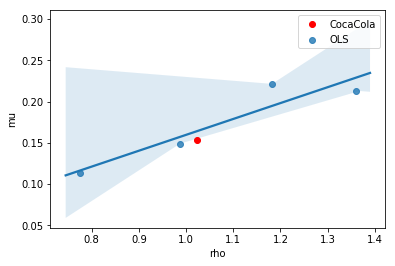

In [25]:
# Ve hinh
sn.regplot(x='rho',y='mu',data=data.loc[2:5,],label='OLS')
plt.plot(data.loc[6,'rho'],data.loc[6,'mu'],'ro',label='CocaCola')
plt.legend()